In [1]:
import pandas as pd
import seaborn as sns

In [2]:
left_PCS_binary = pd.read_csv('/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Heritability/data/UKB_left_binary_pred.csv')
left_PCS_prob = pd.read_csv('/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Heritability/data/UKB_prob_pred.csv')
left_PCS_prob = left_PCS_prob.rename(columns={"Pred" : "Left_Prob_Pred"})

In [3]:
right_PCS_binary = pd.read_csv('/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Heritability/data/UKB_right_binary_pred.csv')
right_PCS_prob = pd.read_csv('/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Heritability/data/UKB_right_prob_pred.csv')

In [4]:
GWAS_PCS = left_PCS_binary.join(right_PCS_binary.set_index('IID'), on='IID', how='inner')
GWAS_PCS = GWAS_PCS.join(left_PCS_prob.set_index('IID'), on='IID', how='inner')
GWAS_PCS = GWAS_PCS.join(right_PCS_prob.set_index('IID'), on='IID', how='inner')
GWAS_PCS['Binary_Asymmetry'] = abs(GWAS_PCS.Left_Binary_Pred - GWAS_PCS.Right_Binary_Pred)
GWAS_PCS['Prob_Asymmetry'] = GWAS_PCS.Left_Prob_Pred * (1-GWAS_PCS.Right_Prob_Pred) + GWAS_PCS.Right_Prob_Pred * (1-GWAS_PCS.Left_Prob_Pred)
GWAS_PCS

,IID,Left_Binary_Pred,Right_Binary_Pred,Left_Prob_Pred,Right_Prob_Pred,Binary_Asymmetry,Prob_Asymmetry
0,1000021,1,1,0.871400,0.992794,0,0.133952
1,1000458,0,0,0.553886,0.352072,0,0.515943
2,1000575,0,1,0.466660,0.445560,1,0.496370
3,1000606,1,1,0.857762,0.983322,0,0.154172
4,1000963,0,1,0.606701,0.977704,1,0.398057
...,...,...,...,...,...,...,...
21046,6023469,1,0,0.700803,0.353273,1,0.558926
21047,6023808,1,1,0.982624,0.992351,0,0.024760
21048,6023847,1,1,0.689217,0.866407,0,0.361339
21049,6024038,1,0,0.753371,0.045662,1,0.730232


<Axes: xlabel='Prob_Asymmetry', ylabel='Count'>

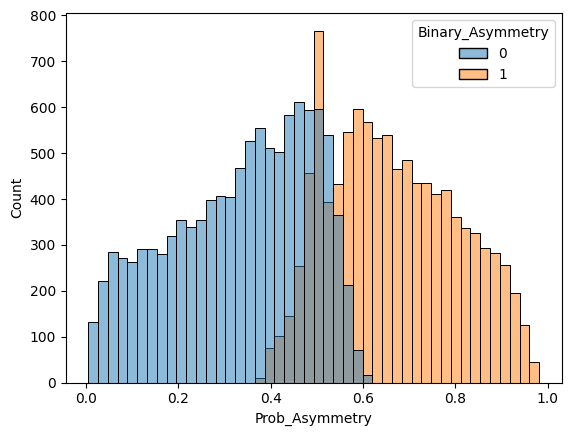

In [5]:
sns.histplot(data=GWAS_PCS, x="Prob_Asymmetry", hue="Binary_Asymmetry")

In [6]:
GWAS_PCS.to_csv('/neurospin/dico/adufournet/Runs/09_PCS_GWAS/PCS_all.csv', index=False)